<a href="https://colab.research.google.com/github/anzibug/anzibug.github.io/blob/main/Medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the depemdences

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis 

In [ ]:
# loading the data from csv file to a pandas dataframe
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# First five rows of dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# numbers of row and colums 
insurance_dataset.shape

(1338, 7)

In [ ]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

cataegorical features
* Sex
* Smoker
* Region

Data analysis 



In [ ]:
# statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


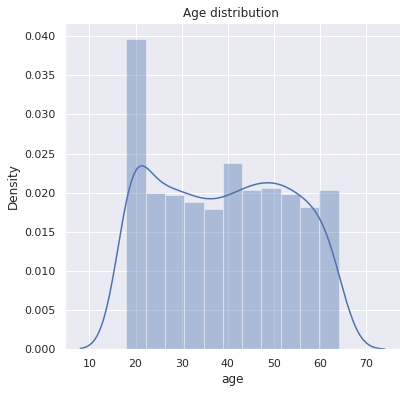

In [ ]:
# distrubution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution ')
plt.show()
    

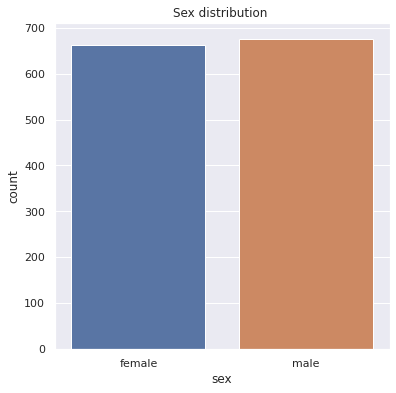

In [ ]:
# Gender coloum 
plt.figure(figsize=(6,6))
sns.countplot(x='sex' , data=insurance_dataset)
plt.title('Sex distribution ')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


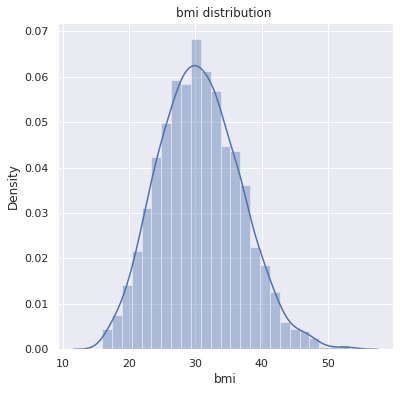

In [ ]:
# distrubution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi distribution ')
plt.show()
    

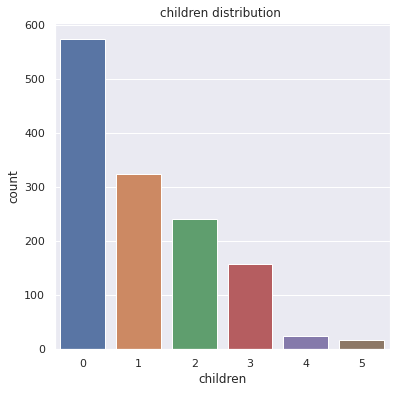

In [ ]:
# Gender coloum 
plt.figure(figsize=(6,6))
sns.countplot(x='children' , data=insurance_dataset)
plt.title('children distribution ')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

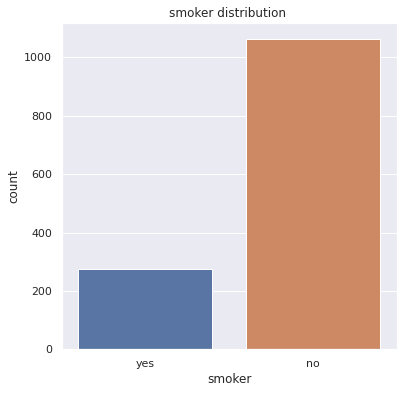

In [ ]:
# smoker coloum 
plt.figure(figsize=(6,6))
sns.countplot(x='smoker' , data=insurance_dataset)
plt.title('smoker distribution ')
plt.show()

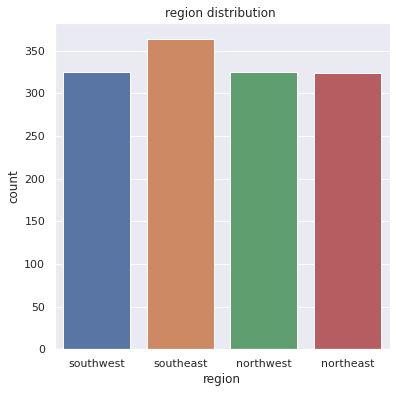

In [ ]:
# region coloum 
plt.figure(figsize=(6,6))
sns.countplot(x='region' , data=insurance_dataset)
plt.title('region distribution ')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


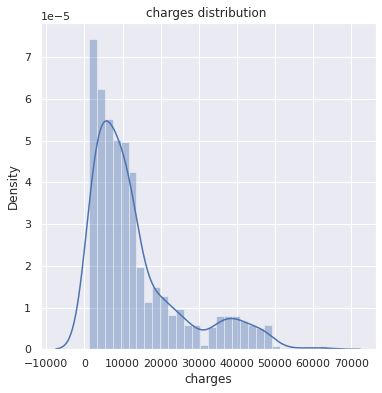

In [ ]:
# charges distribution 

plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges distribution ')
plt.show()
    

Data pre processing

Encoding the categorical features

In [ ]:
# encoding sex coloum 
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)


#encoding smoker coloum
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region coloum
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}}, inplace=True)



In [ ]:
print(insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       3   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


splitting the features and target

In [ ]:
X = insurance_dataset.drop(columns = 'charges',axis=1)
Y = insurance_dataset['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

splitting the data into training data and testing data

In [ ]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2 , random_state = 2) 

In [ ]:
print(X.shape, X_train.shape ,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training

Linear regression 

In [ ]:
# loading thr linear regressor model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

model evaluation

In [ ]:
# prediction in training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train , training_data_prediction)
print('R squared value', r2_train)

R squared value 0.751750322722582


In [ ]:
# prediction in training data
testing_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test , testing_data_prediction)
print('R squared value', r2_test)

R squared value 0.745366156296347


building a predictive system

In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3652.45982961]
The insurance cost is USD  3652.45982960937


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
